In [1]:
import pandas as pd
import string as st
import matplotlib
import numpy as np
import os
from sklearn import decomposition, metrics, cluster

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Create list of Journal abbriviations used on the website
data_Jabbr = '../data/JDict_data/Jabbr.csv'
abbr_names=['Jabbr']
df_Jabbr = pd.read_csv(data_Jabbr,names=abbr_names)
Jabbr=df_Jabbr['Jabbr'].tolist()
# Jabbr=[x.lower() for x in Jabbr]
# Jabbr.sort()

In [3]:
#Create list of Journal file names
Jlist = os.listdir('../data/cite_data_2007')
if '.DS_Store' in Jlist:
    Jlist.remove('.DS_Store')
Jlist=[x.lower() for x in Jlist]
Jlist.sort()

In [4]:
#Creates Dictionary for mapping file name to file abbreviation
JDict_map=dict(zip(Jabbr, Jlist))
df_names=Jlist
JMatrix=pd.DataFrame(data=np.zeros((len(Jlist),len(Jlist))), index=df_names, columns= df_names)

In [5]:
# For loop plan
data_folder = '../data/cite_data_2007/'
for i, Ji in enumerate(Jlist):
    print(i, Ji)
    file = open(data_folder+Jlist[i],'r')
    data = pd.read_csv(file)[:-2]    
    for j, Jj in enumerate(Jabbr):
        num_j_cited_i_row = data[data['Unnamed: 2']==Jabbr[j]]['Unnamed: 3']
        try:
            num_j_cited_i = int(num_j_cited_i_row)
        except:
            num_j_cited_i = 0        

        JMatrix[Jlist[i]][JDict_map[Jabbr[j]]] = num_j_cited_i

0 american journal of psychology_cited.csv
1 behavior research methods_cited.csv
2 behavioral and brain sciences_cited.csv
3 brain and language_cited.csv
4 british journal of psychology_cited.csv
5 cogn linguist_cited.csv
6 cogn syst res_cited.csv
7 cognition_cited.csv
8 cognitive psychology_cited.csv
9 cognitive science_cited.csv
10 computers & education_cited.csv
11 computers in human behavior_cited.csv
12 contemporary educational psychology_cited.csv
13 developmental psychology_cited.csv
14 developmental science_cited.csv
15 educational psychology review_cited.csv
16 etr&d-educational technology research and development_cited.csv
17 international journal of human-computer studies_cited.csv
18 international journal of science education_cited.csv
19 journal of child language_cited.csv
20 journal of cognitive neuroscience_cited.csv
21 journal of educational psychology_cited.csv
22 journal of engineering education_cited.csv
23 journal of experimental psychology-general_cited.csv
24 jour

In [6]:
# each column is the incoming citations INTO that journal (at col j)
# Looking at the parent journal cognitive sci the which is at the top of this graph,
# the journals on the left are citing the journals at the top x number of times from 2007 and all prev years
# THE DATABASE, JCReport, calls these "Citation Values"
JMatrix['international journal of science education_cited.csv']

american journal of psychology_cited.csv                                             0.0
behavior research methods_cited.csv                                                  0.0
behavioral and brain sciences_cited.csv                                              0.0
brain and language_cited.csv                                                         0.0
british journal of psychology_cited.csv                                              0.0
cogn linguist_cited.csv                                                              0.0
cogn syst res_cited.csv                                                              0.0
cognition_cited.csv                                                                  0.0
cognitive psychology_cited.csv                                                       0.0
cognitive science_cited.csv                                                          2.0
computers & education_cited.csv                                                     14.0
computers in human be

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


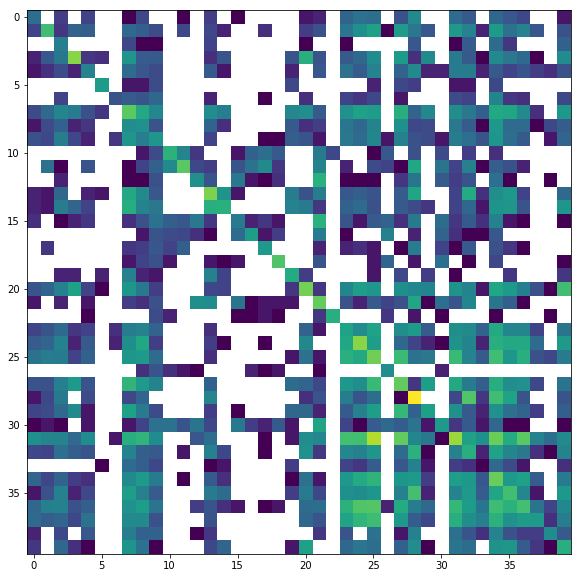

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(np.log(JMatrix))
#np.where(np.sum(JMatrix.as_matrix(), axis=0)==0)#getting nothing in the array[] means dylan didnt screw up (:

### Decomposition

COGNITIVE SCI


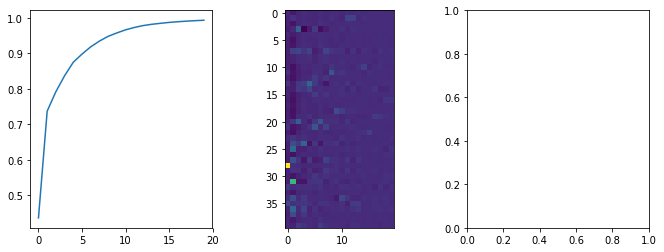

In [8]:
# SVD and PCA gives essentially the same answer, as it should, with rotational indeterminancy
#citation_svd = decomposition.TruncatedSVD(n_components=20)
citation_svd = decomposition.PCA(n_components=20, whiten=False)

# apply matrix factorization to citation matrix
citation_svd.fit(JMatrix.as_matrix())
JMatrix_reduced = citation_svd.transform(JMatrix.as_matrix())

# how many components required to capture 95% variance?
np.where(np.cumsum(citation_svd.explained_variance_ratio_)>=0.95)[0][0]

# cog sci is element 9
ctr_j=9
print(Jabbr[ctr_j])
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
plt.plot(np.cumsum(citation_svd.explained_variance_ratio_))
plt.subplot(1,4,2)
plt.imshow(JMatrix_reduced)
plt.subplot(1,4,3)
# # Cogsci's reduced vector
# plt.plot(JMatrix_reduced[ctr_j,:],'.')
# # Cogsci's components
# plt.subplot(1,4,4)
# plt.plot(citation_svd.components_[:,ctr_j]);
# plt.tight_layout()

In [9]:
# k-means clustering
n_clusters = 5
clu = cluster.KMeans(n_clusters=n_clusters)

clu.fit(JMatrix_reduced)
clu_label = clu.labels_
clu_inds = np.argsort(clu_label)
clu_label
clustered_J = [[Jabbr[i] for i in np.where(clu_label==query_clu)[0]] for query_clu in range(n_clusters)]
pd.DataFrame([t[:20] for t in clustered_J], index=['Clu%i'%i for i in range(n_clusters)]).T

,Clu0,Clu1,Clu2,Clu3,Clu4
0,COGNITION,AM J PSYCHOL,J PERS SOC PSYCHOL,MEM COGNITION,BRAIN LANG
1,J EXP PSYCHOL HUMAN,BEHAV RES METHODS,None,None,J COGNITIVE NEUROSCI
2,J EXP PSYCHOL LEARN,BEHAV BRAIN SCI,None,None,None
3,J MEM LANG,BRIT J PSYCHOL,None,None,None
4,PSYCHOL REV,COGN LINGUIST,None,None,None
5,PSYCHON B REV,COGN SYST RES,None,None,None
6,Q J EXP PSYCHOL,COGNITIVE PSYCHOL,None,None,None
7,None,COGNITIVE SCI,None,None,None
8,None,COMPUT EDUC,None,None,None
9,None,COMPUT HUM BEHAV,None,None,None
